# PROPHET LIBRARY SAMPLE

In [18]:
# bu kısım onemli.. 
# literaturdeki kaynaklar eski versiyonu paylasıyor..hata almamak için bu kurulum önemli


pip install prophet pandas matplotlib plotly scikit-learn

SyntaxError: invalid syntax (953752994.py, line 5)

# Verinin içe aktarılması

In [ ]:
import pandas as pd

path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(path, header=0)

print(df.shape)
print(df.head())

# Verinin Görselleştirilmesi

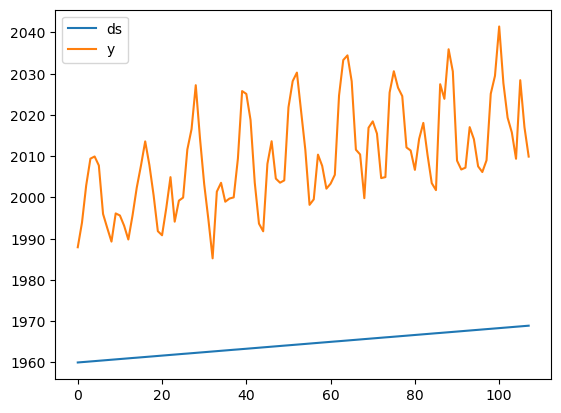

In [19]:
#veri analizinde önce mevsimseliğe bakalım, trend i görelim
# grafikte mevsimsellik ve trend var

from matplotlib import pyplot

df.plot()
pyplot.show()

# Veri Tipi Dönüşümü


In [20]:
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [21]:
# columns tiplerini ve adlarını degiselim

df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

In [22]:
# model oluşturlım

from prophet import Prophet

model = Prophet()
model.fit(df)

00:10:55 - cmdstanpy - INFO - Chain [1] start processing
00:10:55 - cmdstanpy - INFO - Chain [1] done processing


# Ornek içi Tahmin yapalım

In [23]:

#urettiğimiz degerlere karşılık tahminler yaptıracağız
future = list()

for i in range(1, 13):
    date = '1968-%02d' % i
    future.append([date])
    
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
forecast = model.predict(future)

In [24]:
 # tahmin tarih saat ds, tahmin degeri yhat, tahmin edilen deger,n sust ve alt sınırları da 'yhat_lower', 'yhat_upper

In [25]:
# 1 ocak, 1 şubat ,
 1 mart için tahminleri alıyoruz

rint(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

IndentationError: unexpected indent (3706965667.py, line 2)

# Tahminlerin çizdirilmesi

In [ ]:
# tahmin edilen ve gerçek değerler var..
# hem sezonsallıgı hem de trendi yakaladı

model.plot(forecast)
pyplot.show()

In [ ]:
# burada da ornek dışı tahmin yapıyoruz..elimizdkei tüm datalardan 

future = list()

for i in range(1, 13):
    date = '1969-%02d' % i
    future.append([date])
    
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

model.plot(forecast)
pyplot.show()

# Manuel degerlendirme

In [ ]:
# elimizdeki son 1 yılın datasını çıkarıp ondan onceki yılların verisiyle datamızı eğitelim
# son 1 yılın verisini test datası şeklinde tahmin yaptıralım ve gerçek degerlerle tahmini degerleri karşılaştırlaım



In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(path, header=0)

df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])


In [ ]:
# elimizdeki datanın son 1 yılını düşürelim.. 1968 yılı düştü

train = df.drop(df.index[-12:])
print(train.tail())

In [ ]:
# 1968 yılı için tahminl yapalım ve modelş oluşturaup eğitelim

model = Prophet()
model.fit(train)    # 1967 ye kadar olan degerlerle fit ediyoruz

future = list()
for i in range(1, 13):
    date = '1968-%02d' % i
    future.append([date])
    
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])

print('\n Maalesef verbose false yapamiyoruz :/ \n')
forecast = model.predict(future)

In [27]:
#elimizdeki gerçek 1968 degerleri ile tahmin edilenleri kıyaslayacağız
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values

In [28]:
# pred ve actual deger kıyası için MAE yi kullanalım.. ortalama hata

mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 1055.184


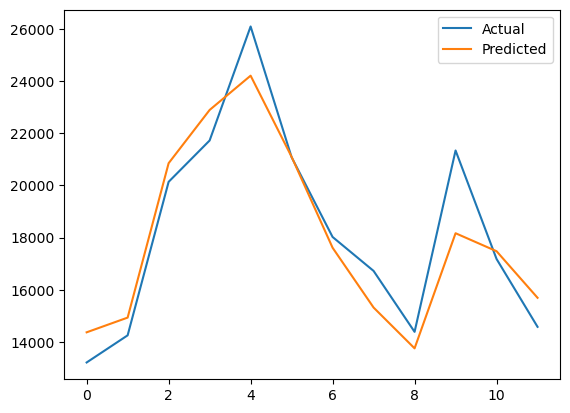

In [29]:
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

# son 1 yıl içindeki değerlerle tahmin edilen değerleri kıyasladık
# hem sezonsallığı hem de trendi yakalamış görünüyor